# Data analysis (improved)

Based on 'Data-analysis-and-mapping.ipynb' with improvements suggested by Achintya @RaoOfPhysics

In [225]:
import csv
import pandas as pd
from pandas import DataFrame, datetime
import numpy as np

# load the data from GitHub raw URL:
data = pd.read_csv('https://raw.githubusercontent.com/open-data-day-cambridge-2018/bicycle-theft-cambridgeshire/master/data/processed/bikethefts.csv')

list(data) # show head of dataframe

['Crime ID',
 'Month',
 'Longitude',
 'Latitude',
 'Location',
 'Last outcome category']

Now to find the total number of bike theft reports (i.e. number of rows in the dataset).

Note that python begins with first row as row 0, so we don't need to subtract 1 to discount the header row.

In [226]:
total = len(data.index)
print(total)

4394


So there were 4,394 bike thefts reported in Cambridgeshire in 2017.

In [227]:
# make a series that sums the frequency per month
monthCounts = data.Month.value_counts()
# turn series into dataframe and name the column headers
monthData = pd.DataFrame({'Month':monthCounts.index,'Frequency':monthCounts.values})
# check dataframe - header only
list(monthData)

['Frequency', 'Month']

Let's see the full dataframe

In [228]:
print(monthData)

    Frequency    Month
0         495  2017-06
1         468  2017-10
2         442  2017-05
3         432  2017-08
4         428  2017-07
5         385  2017-11
6         335  2017-09
7         331  2017-03
8         318  2017-04
9         264  2017-02
10        257  2017-12
11        239  2017-01


Now to try out two ways to map the month data we have onto month names, and reorder by date ascending.

In [229]:
# monthData1 will be for to_datetime conversion approach
monthData1 = pd.DataFrame({'Month':monthCounts.index,'Frequency':monthCounts.values})

# Using monthData1, convert Month values to datetime
monthData1['Month'] = pd.to_datetime(monthData1['Month'])

# reorder data by Month column
monthData1.sort_values(by=['Month'], ascending=True)

,Frequency,Month
11,239,2017-01-01
9,264,2017-02-01
7,331,2017-03-01
8,318,2017-04-01
2,442,2017-05-01
0,495,2017-06-01
4,428,2017-07-01
3,432,2017-08-01
6,335,2017-09-01
1,468,2017-10-01


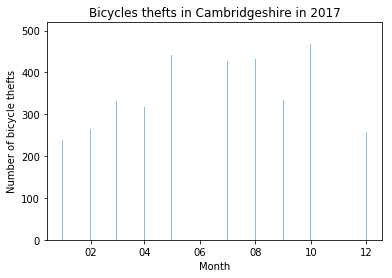

In [232]:
import matplotlib.pyplot as plt
from matplotlib import dates as mPlotDATEs
from matplotlib.dates   import  DateFormatter

x_data = monthData1.Month
y_data = monthData1.Frequency
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def barplot(x_data, y_data, x_label="Month", y_label="Number of bicycle thefts", title="Bicycles thefts in Cambridgeshire in 2017"):
    fig, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#7fc0e4', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    # ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.xaxis.set_major_formatter(DateFormatter('%m')) # sets x-axes as month number only
    # ax.xaxis.set_ticks(np.arange('01', '12', 1)) # set the x-ticks to be one space apart (start,end,stepsize)
    # ax.set_xticklabels(months) # map the month numbers onto month strings as defined above
    ax.set_title(title)

barplot(x_data,y_data)

**To finish** Struggling to manipulate the x-axis tick labels to help graph display properly - can't get tickmarks to stepsize by 1 as not reading string into the np.arange().

In [233]:
# Using monthData2, alternative to pd.to_datetime: convert Month column to months using a dictionary
monthData2 = pd.DataFrame({'Month':monthCounts.index,'Frequency':monthCounts.values})

# First remove the 'YYYY-' string
monthData2['Month'] = monthData2['Month'].str.replace(r'2017-*', '')

# map the 'MM' string to integers
mmMap = {'01': 1, '02': 2, '03': 3, '04': 4, '05': 5,'06': 6, 
         '07': 7, '08': 8, '09': 9, '10': 10, '11': 11, '12': 12}
monthData2['Month'] = monthData2['Month'].apply(lambda x: mmMap[x])

# sort by Month column (ascending integers)
monthData2 = monthData2.sort_values(by=['Month'], ascending=True)

# map the Month integers to month names using a dictionary
# monthMap = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
#            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
# monthData['Month'] = monthData['Month'].apply(lambda x: monthMap[x])
print(monthData2)

    Frequency  Month
11        239      1
9         264      2
7         331      3
8         318      4
2         442      5
0         495      6
4         428      7
3         432      8
6         335      9
1         468     10
5         385     11
10        257     12


Plot the data

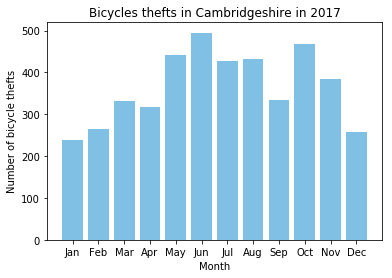

In [234]:
import matplotlib.pyplot as plt

x_data = monthData2.Month
y_data = monthData2.Frequency
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def barplot(x_data, y_data, x_label="Month", y_label="Number of bicycle thefts", title="Bicycles thefts in Cambridgeshire in 2017"):
    fig, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#7fc0e4', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    # ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.xaxis.set_ticks(np.arange(1, 13, 1)) # set the x-ticks to be one space apart (start,end,stepsize)
    ax.set_xticklabels(months) # map the month numbers onto month strings as defined above
    ax.set_title(title)

barplot(x_data,y_data)